In [2]:
import cv2
import numpy as np
import imageio
import easygui
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk,Image

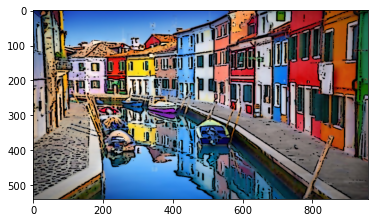

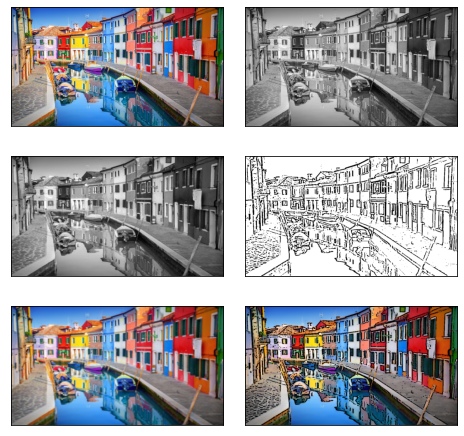

In [8]:
#above 6 line code is to create an GUI window 
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify your image!')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))



#building an file box to load the image
# firebox opens the box to choose the file
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

    
# as every operation is done after button clicks so now we create an cartoonify function
def cartoonify(ImagePath):
    #read the image
    originalimage=cv2.imread(ImagePath)#imread is the method used to store the image in the nform of numbers
    originalimage=cv2.cvtColor(originalimage,cv2.COLOR_BGR2RGB)
    #print(image)#image is stored in the form of numbers
    
    #to confirm if the image is choosen
    if originalimage is None:
        print('Image not found')
        sys.exit()
        
    ReSized1=cv2.resize(originalimage,(960,540))
    plt.imshow(ReSized1,cmap='gray')
    
    # we resize image after each transformation to display all imageson similar scale

    # converting image to grayscale
    grayScaleImage=cv2.cvtColor(originalimage,cv2.COLOR_BGR2GRAY)#cvtColor(image,flag) is a method to transform animage
    ReSized2=cv2.resize(grayScaleImage,(960,540))
    plt.imshow(ReSized2,cmap='gray')
    #cvtColor(image,flag)
    
    #smoothing the image
    #applying median blur to smoothing an image
    smoothGrayScale=cv2.medianBlur(grayScaleImage,5)
    ReSized3=cv2.resize(smoothGrayScale,(960,540))
    plt.imshow(ReSized3,cmap='gray')
    
    """cartoon effect have two specialities
    highlight-highlighting the image or skeleton of image in b/w
    smooth colors-adding color to the picture for beautifying the picture
    by using thresholding technique we highlight the image and add mask for smoothing"""
    
    
    #retrieving the edges of image
    #retrieving edges for cartoon effect by using thresholding technique
    getEdge=cv2.adaptiveThreshold(smoothGrayScale,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,9)
    ReSized4=cv2.resize(getEdge,(960,540))
    plt.imshow(ReSized4,cmap='gray')
    
    #Prepearing an mask image
    #applying bilateral filter to remove noise 
    colorImage=cv2.bilateralFilter(originalimage,9,300,300)
    ReSized5=cv2.resize(colorImage,(960,540))
    plt.imshow(ReSized5,cmap='gray')
    
    
    #giving cartoon effect/ adding both highlight/edges and smoothcolor/mask at same time
    #mask edge with our color image
    cartoonImage=cv2.bitwise_and(colorImage,colorImage,mask=getEdge)
    ReSized6=cv2.resize(cartoonImage,(960,540))
    plt.imshow(ReSized6,cmap='gray')
    
    
    #plotting all transition together i.e. plotting every image altogether
    images=[ReSized1,ReSized2,ReSized3,ReSized4,ReSized5,ReSized6]
    fig,axes=plt.subplots(3,2,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
    #to plot all images we make list of image as images
    #then we create axes like subplots to displaz all image one-one image using imshow()method
    for i,ax in enumerate(axes.flat):
        ax.imshow(images[i],cmap='gray')
   
    
    save1=Button(top,text="Save cartoon image",command=lambda: save(ImagePath, ReSized6),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    #The above code makes a button as soon as the image transformation is done.
    #It gives an option to the user to save cartoonified image.
    
    plt.show()
    
#we are saving the file in the same directory the file is uploaded from
def save(ReSized6,ImagePath):
    newName='cartoonified_image'
    path1=os.path.dirname(ImagePath)#use to extract the haed of the uploaded file path
    extension=os.path.splitext(ImagePath)[1]#used to extract the extraction from file path
    path=os.path.join(path1,newName+extension)#joins the head of the path to new name and extension
    cv2.imwrite(path,cv2.cvtColor(ReSized6,cv2.COLOR_RGB2BGR))#saving the image using imwrite()method
    I='Image Saved By Name'+newName+'at'+path
    tk.messagebox.showinfo(title=None,message=I)#confirmation is given to user
    

upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)
# making cartoonify buttom on gui to upload pictures



top.mainloop()
